In [1]:
import polars as pl
import numpy as np

# 读取数据
data = pl.read_parquet("daily_data.pa")

df = data.sort('open_time').sort("symbol")

x1 = 65
x2 = 55

df = df.with_columns([
    (pl.col('quote_volume') / pl.col('volume')).alias('vwap'),
    (pl.col('volume') - pl.col('volume').shift(x1)).alias('volume_change'),
    (pl.col('close') / (pl.col('close').shift(1).over('symbol')) - 1).alias('return')
])

df = df.with_columns([
    (pl.col('vwap') - pl.col('close')).rolling_max(x2).alias('vwap_close_max'),
    (pl.col('vwap') - pl.col('close')).rolling_min(x2).alias('vwap_close_min')
])

df = df.with_columns([
    (pl.col('vwap_close_max') + pl.col('vwap_close_min') * pl.col('volume_change')).alias('alpha011')
])

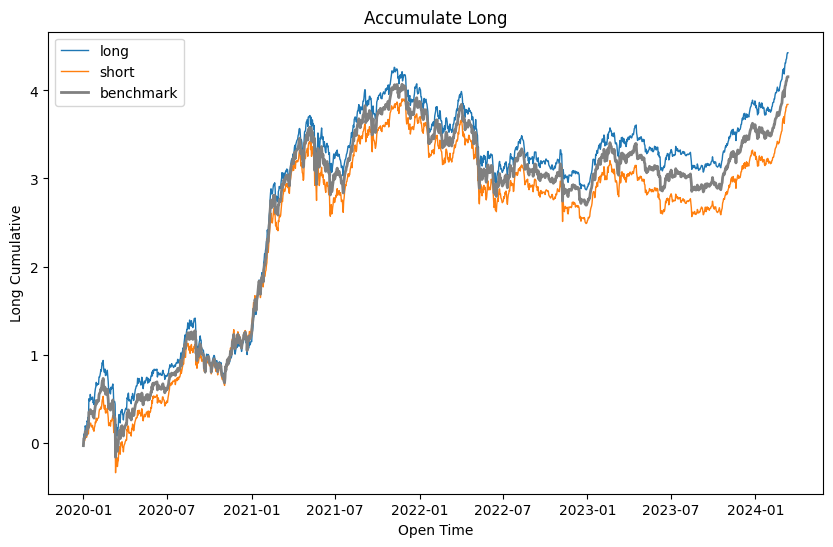

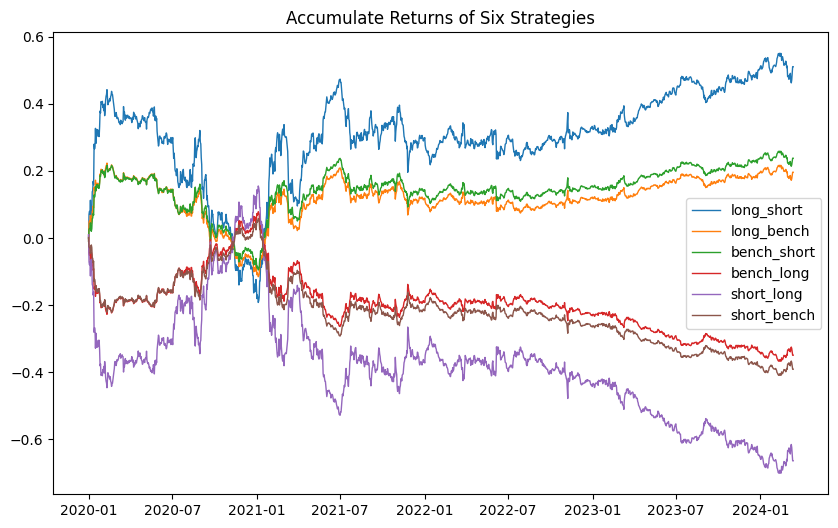

long: 
ann_return = 25.3026  sharpe = 5.4803  maxdd = 0.4764  calmar_ratio = 53.1119  

short: 
ann_return = 21.9485  sharpe = 4.7662  maxdd = 0.5687  calmar_ratio = 38.5911  

bench: 
ann_return = 23.7448  sharpe = 5.2089  maxdd = 0.5174  calmar_ratio = 45.8928  

long_short: 
ann_return = 2.9161  sharpe = 2.1867  maxdd = 0.4396  calmar_ratio = 6.6341  

long_bench: 
ann_return = 1.1198  sharpe = 1.6556  maxdd = 0.2767  calmar_ratio = 4.0464  

bench_long: 
ann_return = -1.9958  sharpe = -2.9508  maxdd = 0.413  calmar_ratio = -4.8325  

short_long: 
ann_return = -3.7921  sharpe = -2.8436  maxdd = 0.7409  calmar_ratio = -5.1186  

short_bench: 
ann_return = -2.2343  sharpe = -3.3763  maxdd = 0.4414  calmar_ratio = -5.0615  

bench_short: 
ann_return = 1.3583  sharpe = 2.0526  maxdd = 0.2562  calmar_ratio = 5.3013  



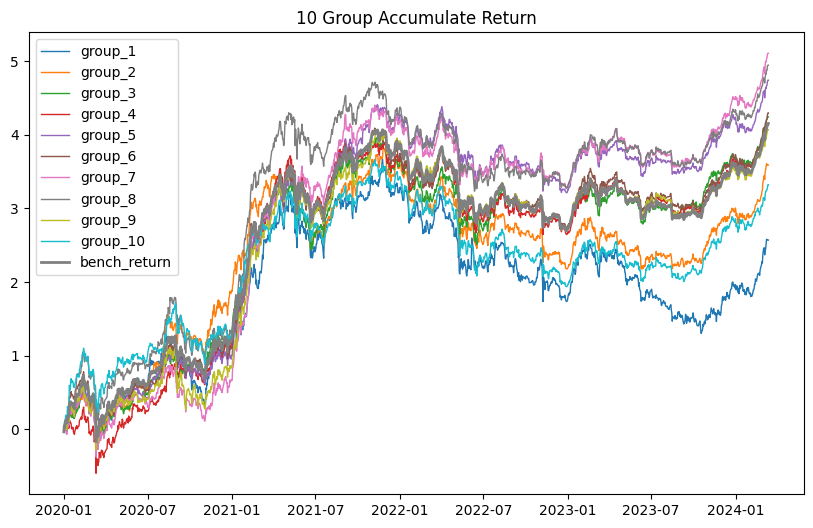

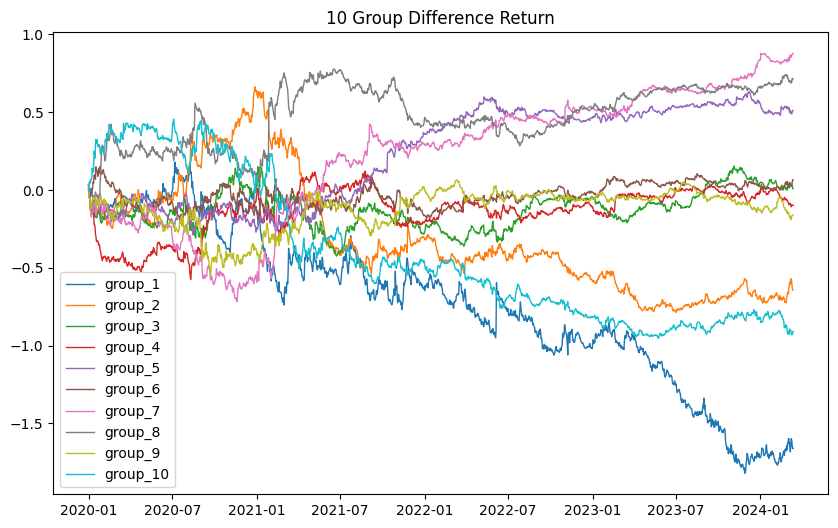

group_1: 
ann_return = 14.6871  sharpe = 2.8068  maxdd = 0.5159  calmar_ratio = 28.4698  

group_2: 
ann_return = 20.5083  sharpe = 4.1482  maxdd = 0.4936  calmar_ratio = 41.5464  

group_3: 
ann_return = 24.2387  sharpe = 5.0853  maxdd = 0.5769  calmar_ratio = 42.013  

group_4: 
ann_return = 23.6204  sharpe = 5.122  maxdd = 0.6909  calmar_ratio = 34.1902  

group_5: 
ann_return = 27.1015  sharpe = 5.8089  maxdd = 0.5865  calmar_ratio = 46.2118  

group_6: 
ann_return = 24.5589  sharpe = 5.2873  maxdd = 0.5337  calmar_ratio = 46.0163  

group_7: 
ann_return = 29.1911  sharpe = 6.1766  maxdd = 0.5941  calmar_ratio = 49.1371  

group_8: 
ann_return = 28.2687  sharpe = 5.7531  maxdd = 0.4723  calmar_ratio = 59.8503  

group_9: 
ann_return = 23.2621  sharpe = 4.8098  maxdd = 0.547  calmar_ratio = 42.5267  

group_10: 
ann_return = 18.9811  sharpe = 3.9791  maxdd = 0.4349  calmar_ratio = 43.643  

-----------------------------------------
group_difference_1: 
ann_return = -9.4957  sharpe =

In [2]:
factors = df.select(['open_time', 'symbol', 'alpha011'])

from factor_analysis.factor_analysis import FactorAnalysis

# 使用示例
analysis = FactorAnalysis(factors, data)
analysis.run_full_analysis()